gmail_spam_detection:

- our goal for this competition is to build a spam filter by predicting whether an email message is spam (junk email) or ham (good email). This is a classic data set derived from a *bag-of-words* model applied 4601 email messages collected at Hewlett-Packard Labs. The features consist of the relative frequencies of 57 of the most commonly occurring words and punctuation marks in all the training the email messages. For this problem, not all errors are equal; misclassifying spam is not as bad as misclassifying ham!



Importing the dataset

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("spam_ham_dataset.csv")

In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [8]:
data.shape

(5171, 4)

In [7]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


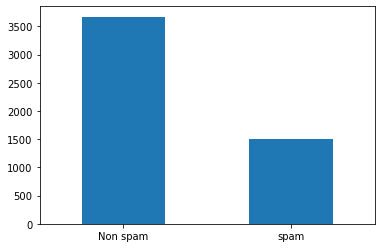

In [11]:
Vis = data['label_num'].value_counts()
Vis.plot(kind="bar")
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0)
plt.show()

In [12]:
data.loc[data['label'] == 'spam', 'Category',] = 0
data.loc[data['label'] == 'ham', 'Category',] = 1

In [14]:
X = data['text']
Y = data['label']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [16]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train_transformed, Y_train)

LogisticRegression()

In [19]:
prediction_on_training_data = model.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  99.70986460348162


In [28]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv.fit(X_train_transformed, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
prediction_on_training_data = knn_cv.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  98.25918762088975


In [34]:
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, X, Y, cv=5)
rfc.fit(X_train_transformed, Y_train)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\deept\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deept\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\deept\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\deept\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\deept\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

RandomForestClassifier(random_state=42)

In [35]:
prediction_on_training_data =rfc.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  100.0


# Conclusion:
Hence, the accuracy of random forest is more, this model is used to build the model.